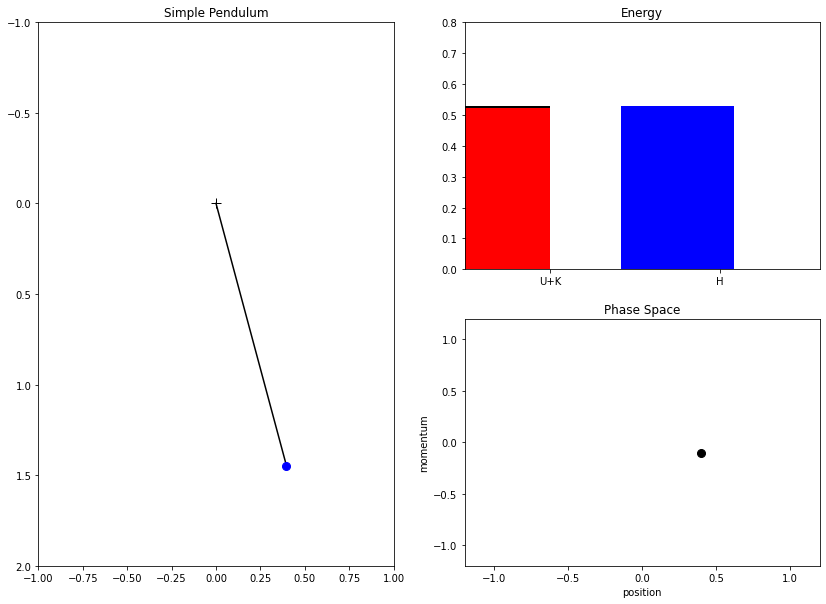

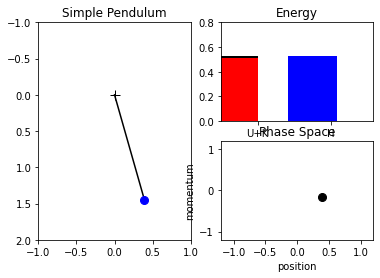

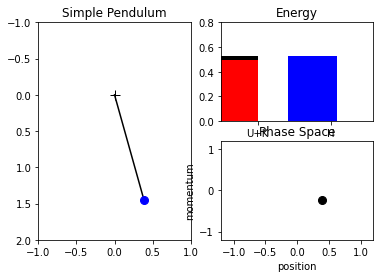

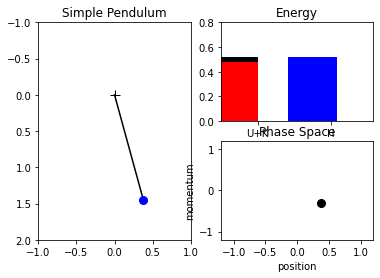

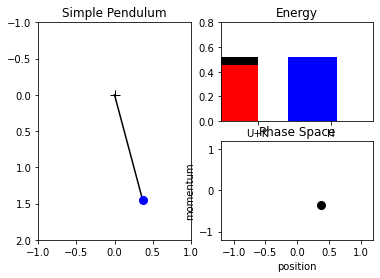

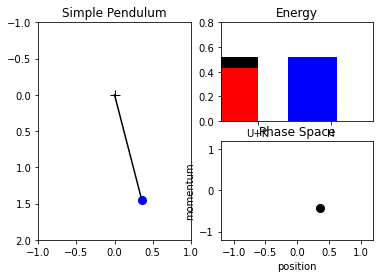

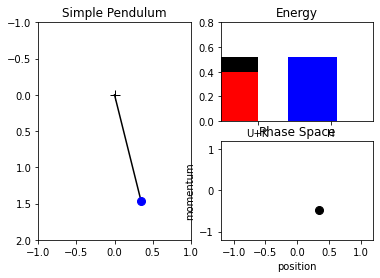

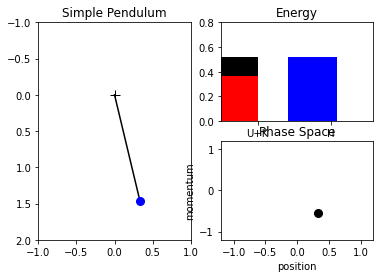

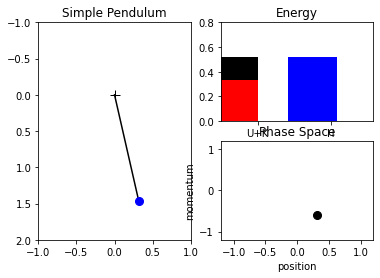

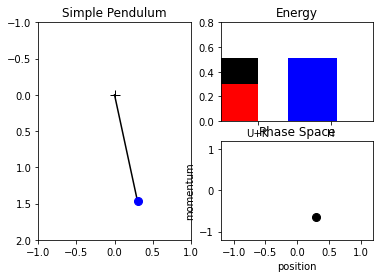

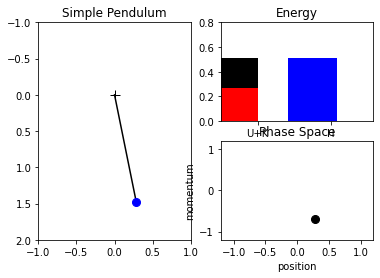

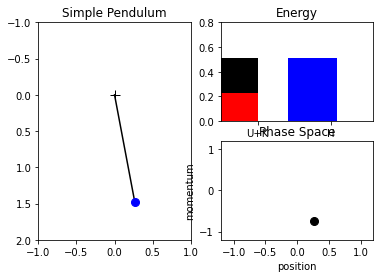

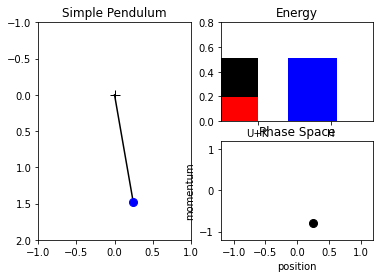

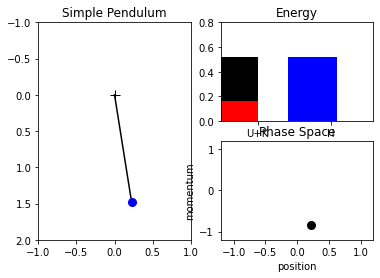

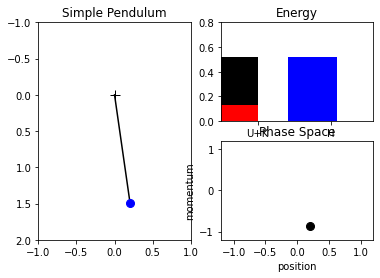

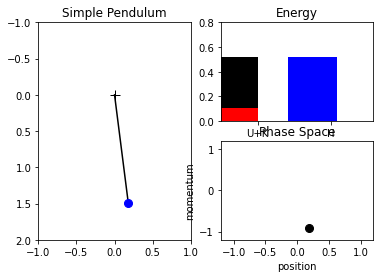

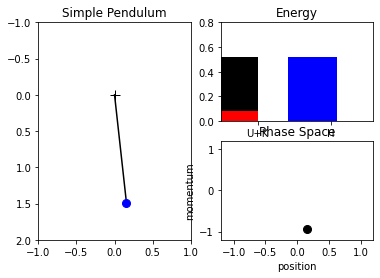

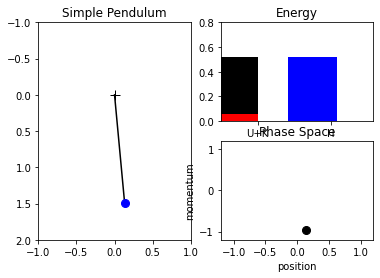

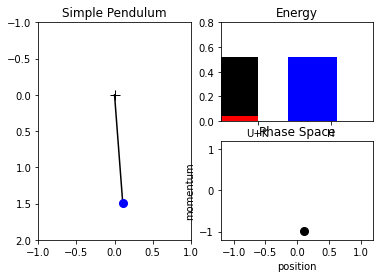

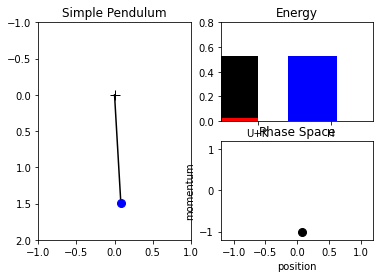

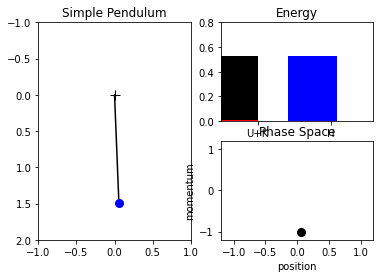

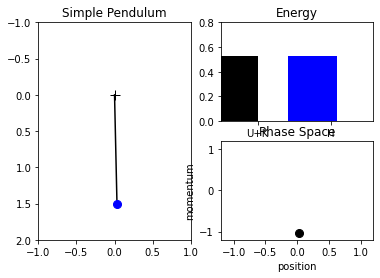

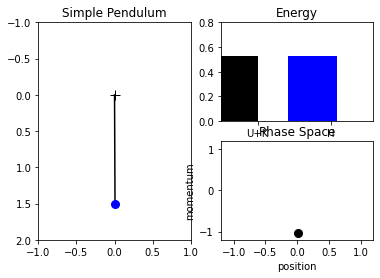

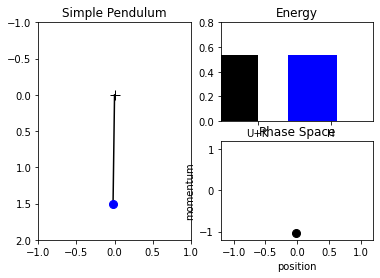

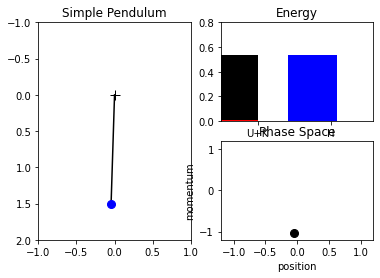

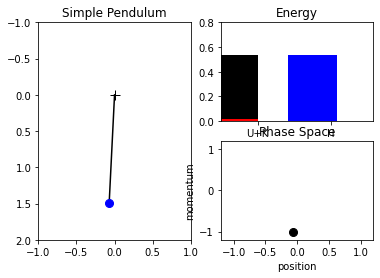

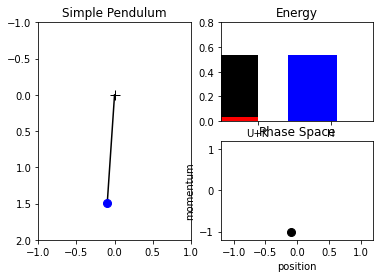

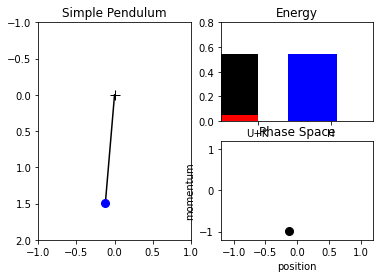

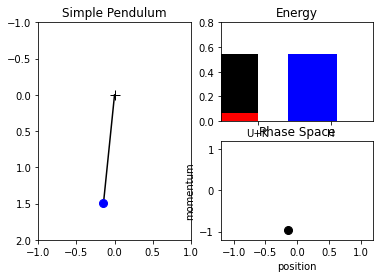

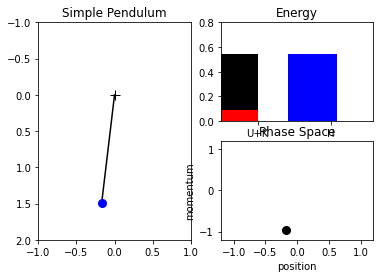

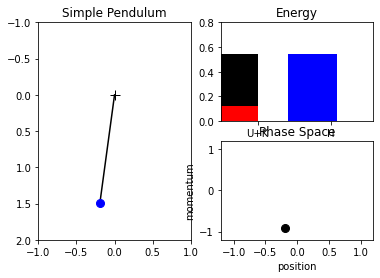

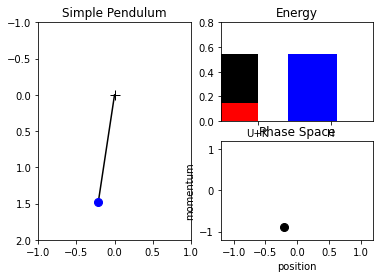

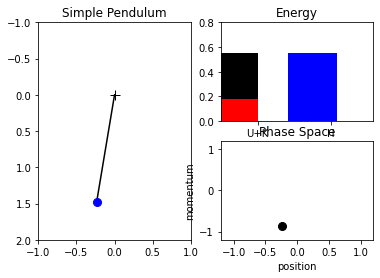

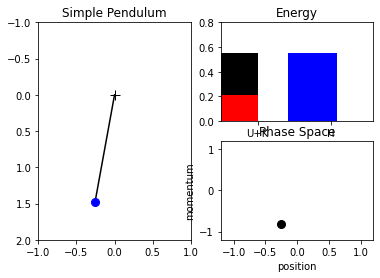

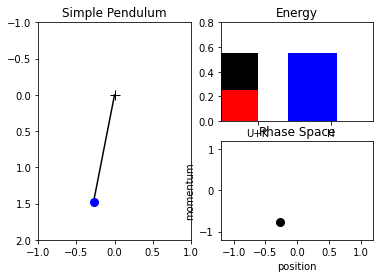

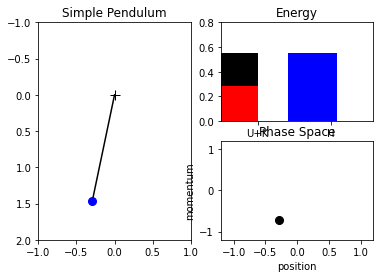

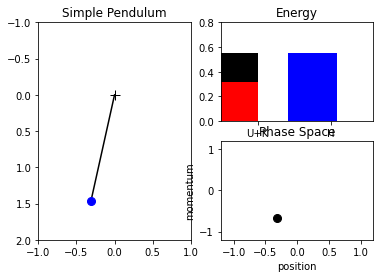

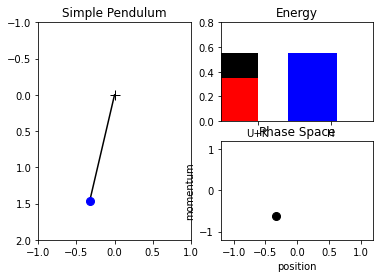

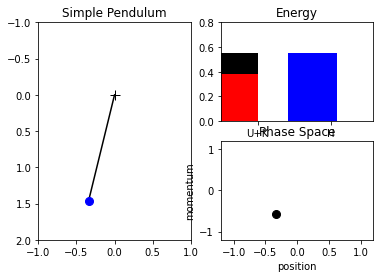

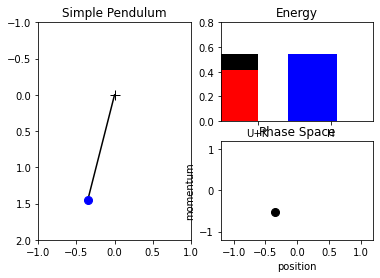

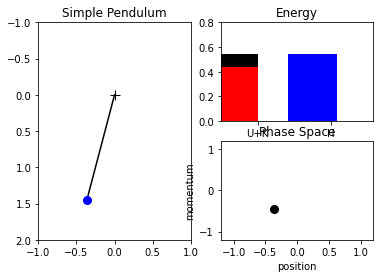

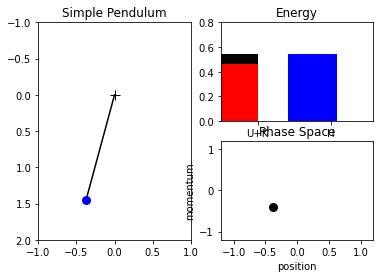

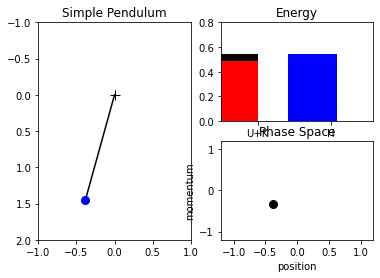

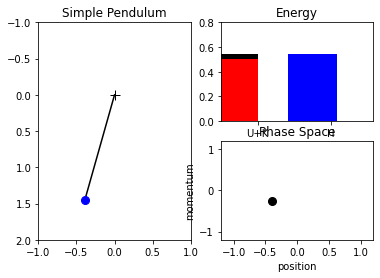

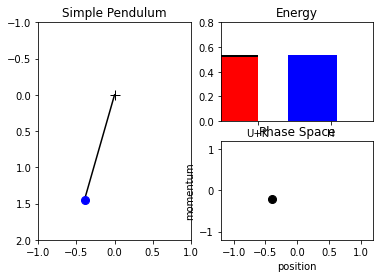

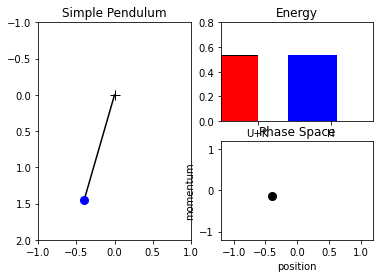

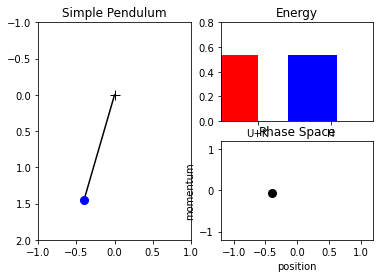

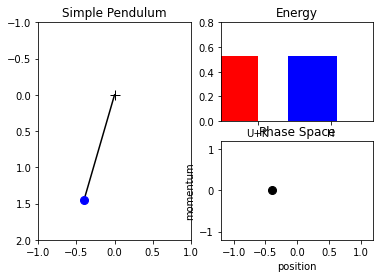

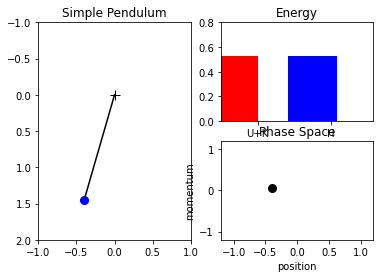

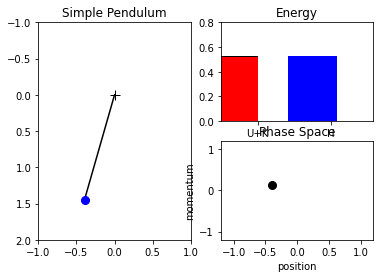

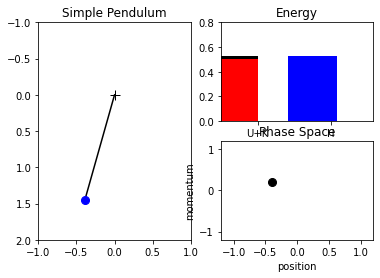

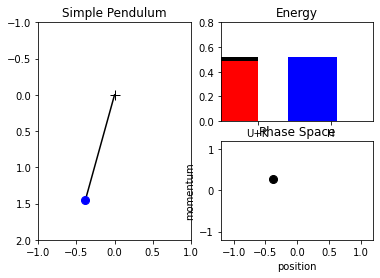

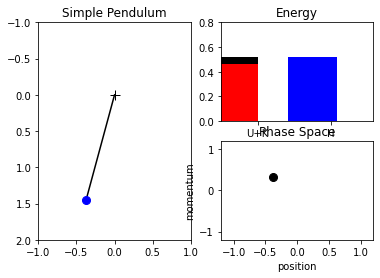

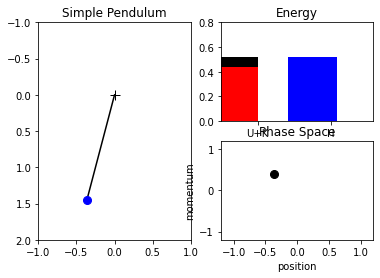

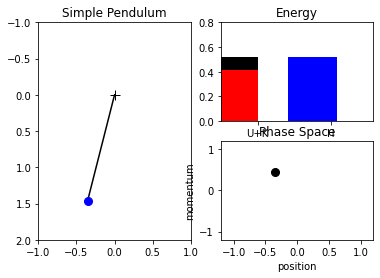

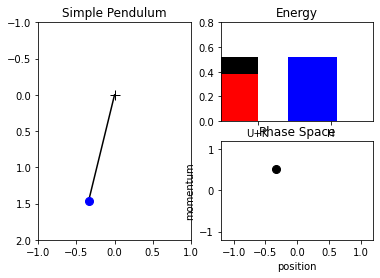

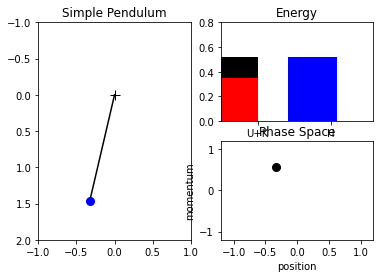

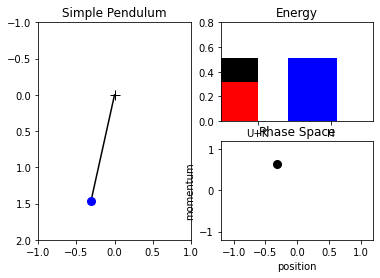

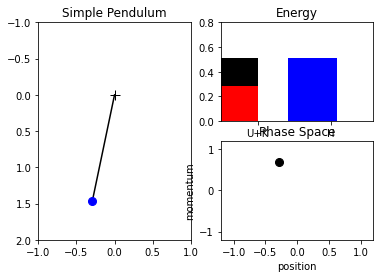

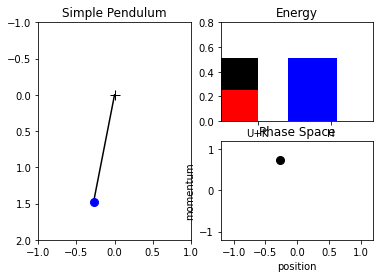

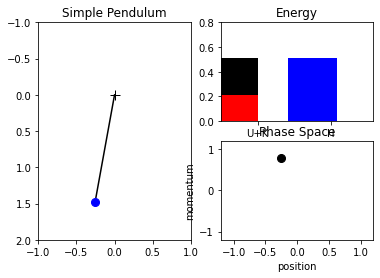

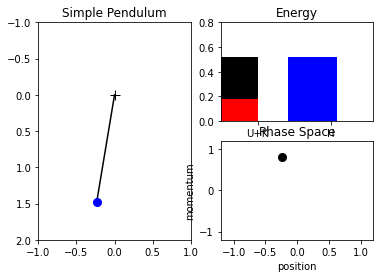

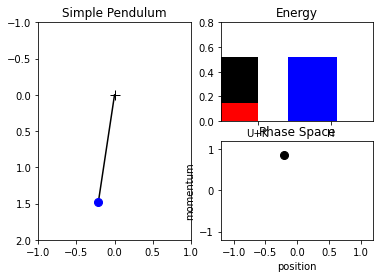

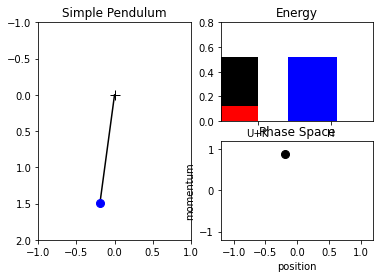

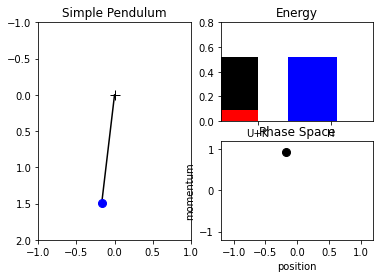

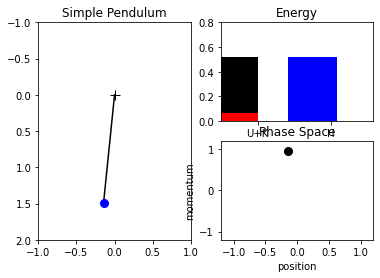

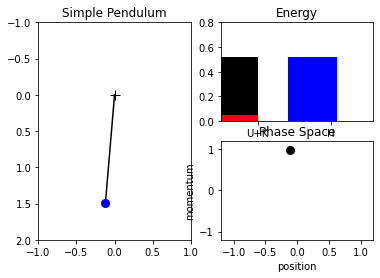

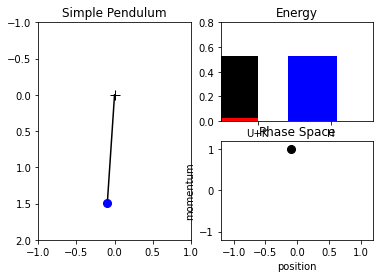

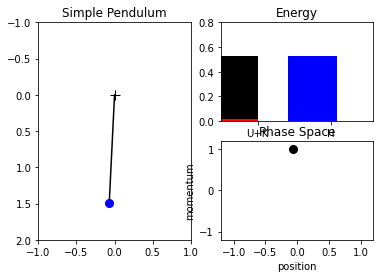

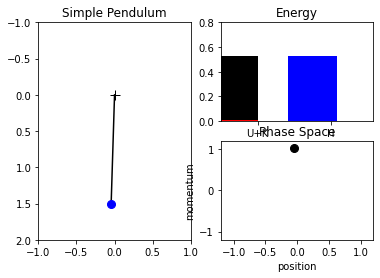

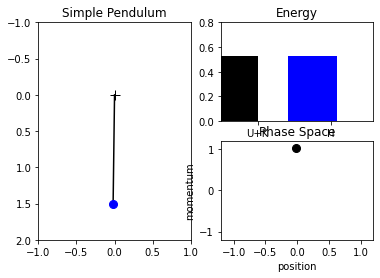

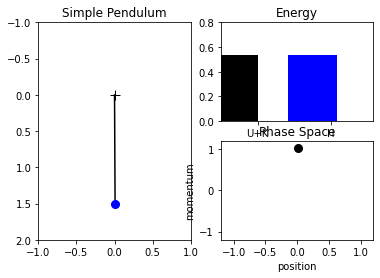

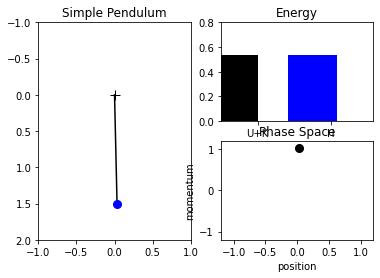

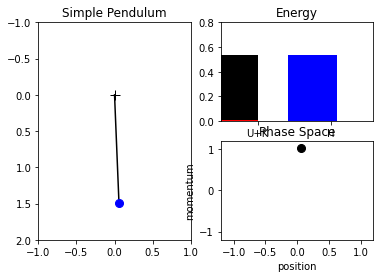

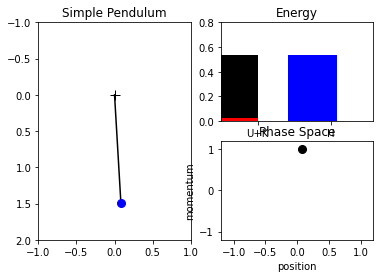

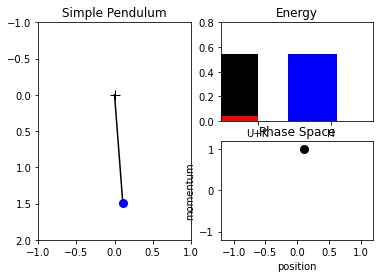

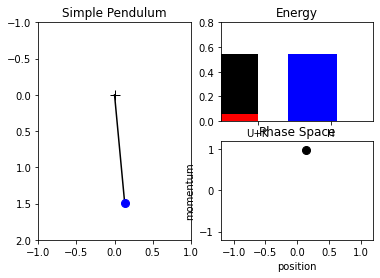

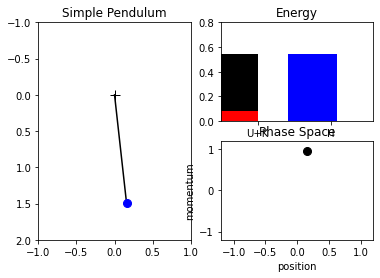

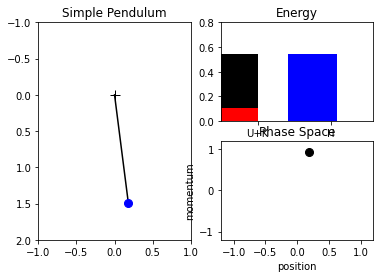

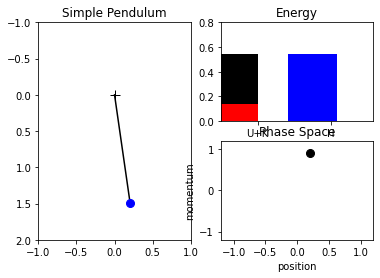

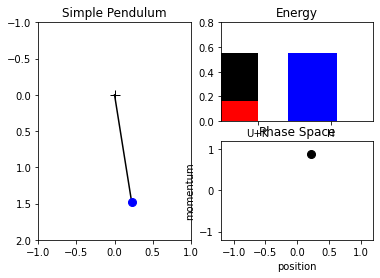

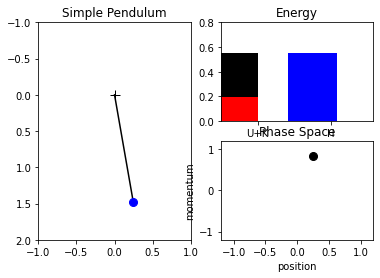

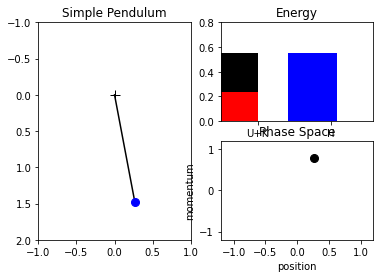

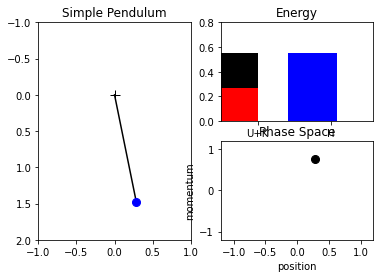

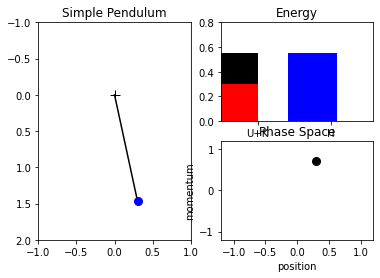

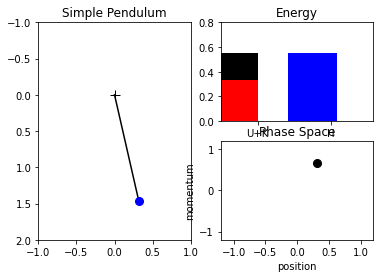

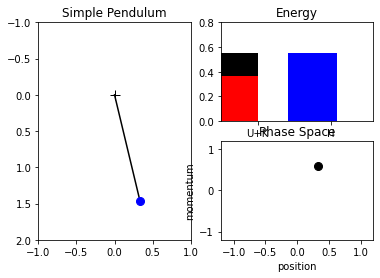

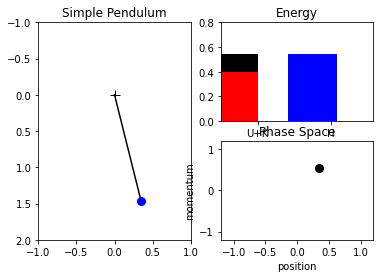

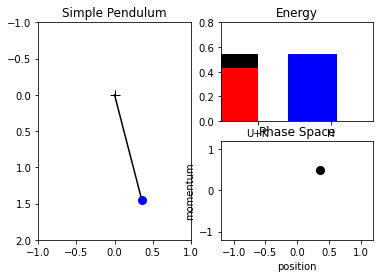

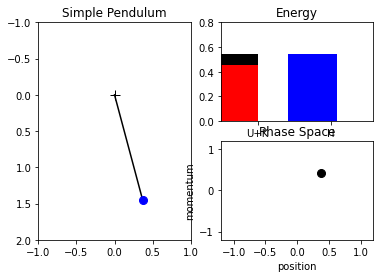

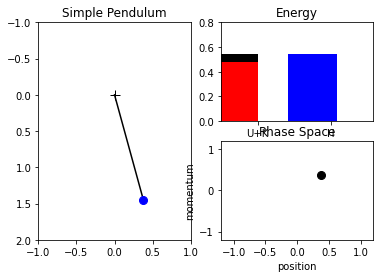

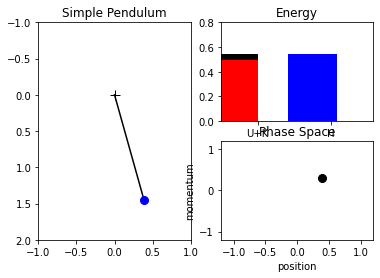

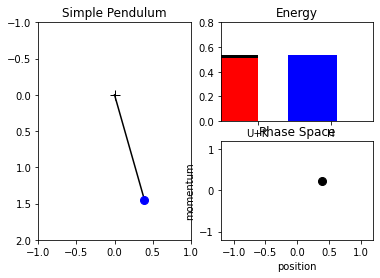

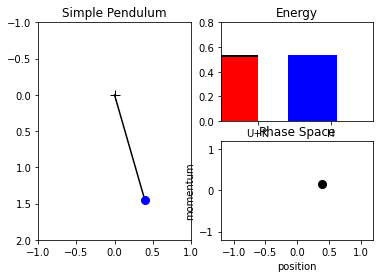

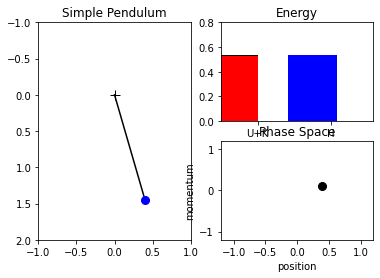

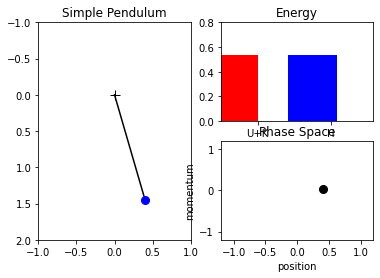

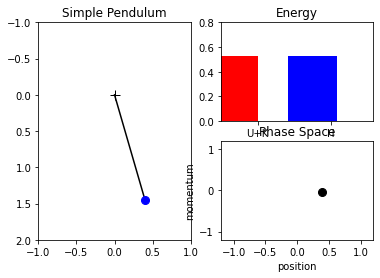

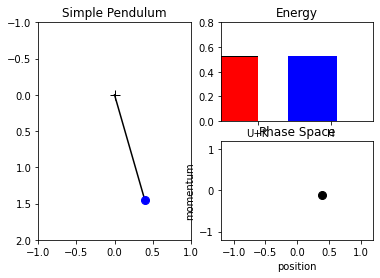

In [5]:
import matplotlib.pyplot as plt
import numpy as np

epsilon = 0.025  # Stepsize
num_steps = 98  # No of steps to simulate dynamics
m = 1  # Unit mass
l = 1.5  # length of string
g = 9.8  # Gravity of earth

def K(p):
    return 0.5* (p**2) / m

def U(x):
    epsilon_h = l * (1 - np.cos(np.arcsin(x/l)))
    return m * g * epsilon_h

def dU(x):
    return (m * g * l * x) / (1.5 * np.sqrt(l**2 - x**2))

x0 = 0.4
p0 = 0
plt.ion() ; plt.figure(figsize=(14, 10))
# Take first half step for momentum
pStep = p0 - (epsilon / 2) * dU(x0)
# Take first full step for position
xStep = x0 + epsilon * pStep
# Take full steps
for num_steps in range(num_steps):
    # Update momentum and position
    pStep = pStep - epsilon * dU(xStep)
    xStep = xStep + epsilon * (pStep / m)
    # Display
    plt.subplot(121); plt.cla();
    theta = np.arcsin(xStep / 1.5)
    y_coord = 1.5 * np.cos(theta)
    x = np.linspace(0, xStep, 1000)
    y = np.tan(0.5*np.pi - theta) * x
    plt.plot(0, 0, 'k+', markersize=10)
    plt.plot(x, y, c='black')
    plt.plot(x[-1], y[-1],'bo', markersize=8)
    plt.xlim([-1, 1]); plt.ylim([2, -1]);
    plt.title("Simple Pendulum")
    plt.subplot(222); plt.cla();
    potential_energy = U(xStep)
    kinetic_energy = K(pStep)
    plt.bar(0.2, potential_energy, color='r')
    plt.bar(0.2, kinetic_energy, color='k', bottom=potential_energy)
    plt.bar(1.5, kinetic_energy+potential_energy, color='b')
    plt.xlim([0, 2.5]); plt.xticks([0.6, 1.8], ('U+K', 'H'))
    plt.ylim([0, 0.8]); plt.title("Energy");

    plt.subplot(224); plt.cla()
    plt.plot(xStep,pStep,'ko', markersize=8)
    plt.xlim([-1.2, 1.2]); plt.ylim([-1.2, 1.2])
    plt.xlabel('position'); plt.ylabel('momentum')
    plt.title("Phase Space")
    plt.pause(0.005)
# The last half step for momentum
pStep = pStep - (epsilon/2) * dU(xStep)